In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = '../Dataset/Embedding/'
outputFilename = 'BoostingOutput.csv'

## With Word Embedding (BoW) Dataset

In [5]:
X = pd.read_csv(path+'kolkata_WE_100.csv')
Y = pd.read_csv(path+'kolkata_classLabel_named.csv')
print(X.shape,Y.shape)

(8329, 100) (8329, 2)


In [6]:
Y

,Unnamed: 0,label
0,0,Vehicle breakdown
1,1,Roads related congestion
2,2,Vehicle breakdown
3,3,Roads related congestion
4,4,Vehicle breakdown
...,...,...
8324,8324,Roads related congestion
8325,8325,City program
8326,8326,Roads related congestion
8327,8327,Closed Avenue


In [7]:
Y.label.value_counts()

City program                2150
Roads related congestion    1811
Vehicle breakdown           1636
Closed Avenue               1375
Others                      1103
Road blockage                254
Name: label, dtype: int64

In [8]:
labels = Y.label.unique()
labels.sort()
labels

array(['City program', 'Closed Avenue', 'Others', 'Road blockage',
       'Roads related congestion', 'Vehicle breakdown'], dtype=object)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(6246, 100) (2083, 100)


In [10]:
model = GradientBoostingClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [11]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[2.46319564e-04, 1.77331185e-04, 3.22806045e-04, 7.78149339e-05,
        2.84483707e-03, 9.96330891e-01],
       [1.49417290e-03, 6.02132766e-04, 4.55988762e-03, 5.86847165e-04,
        9.91303594e-01, 1.45336586e-03],
       [1.83430137e-04, 1.62043466e-04, 1.93561711e-04, 3.87863653e-05,
        1.70209610e-03, 9.97720082e-01],
       ...,
       [8.01463562e-03, 2.11106016e-03, 3.64999601e-03, 2.11656290e-03,
        9.83419762e-01, 6.87983172e-04],
       [1.60346686e-02, 1.36543602e-02, 2.03476170e-02, 2.95943259e-03,
        9.46037680e-01, 9.66241775e-04],
       [5.48730233e-04, 2.24301871e-04, 5.34953455e-04, 1.06649941e-04,
        3.47664682e-03, 9.95108718e-01]])

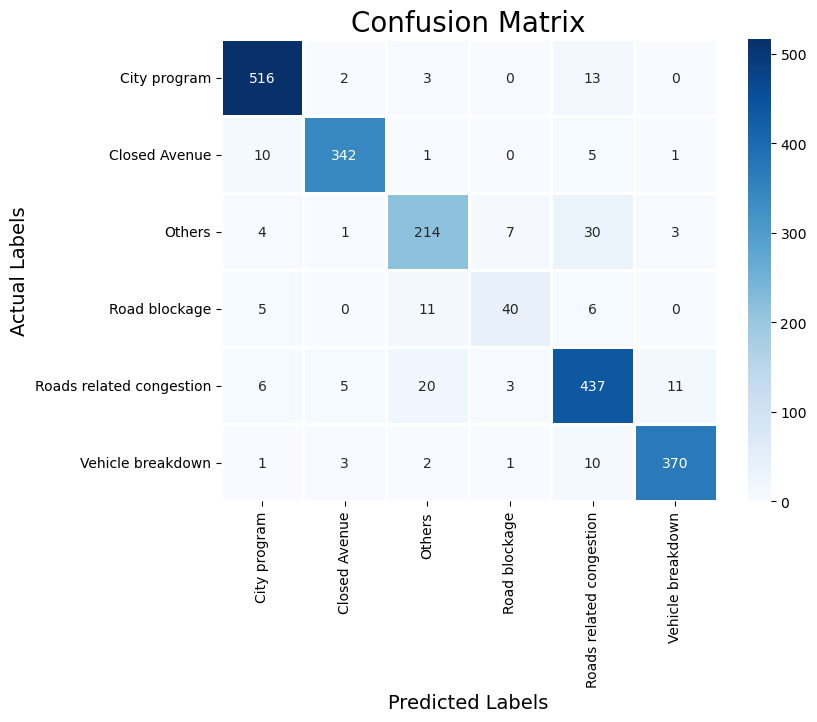

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
cm = pd.DataFrame(cm , index = [i for i in labels] , columns = [i for i in labels])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [13]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                          precision    recall  f1-score   support

            City program       0.95      0.97      0.96       534
           Closed Avenue       0.97      0.95      0.96       359
                  Others       0.85      0.83      0.84       259
           Road blockage       0.78      0.65      0.71        62
Roads related congestion       0.87      0.91      0.89       482
       Vehicle breakdown       0.96      0.96      0.96       387

                accuracy                           0.92      2083
               macro avg       0.90      0.88      0.89      2083
            weighted avg       0.92      0.92      0.92      2083

F1-score:  92.12674027844456 %


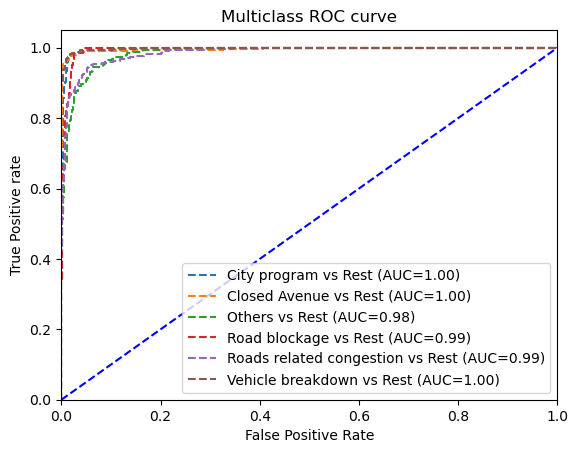

In [14]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [15]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.921,0.899,0.876,0.886,0.993


In [16]:
import sys

with open(outputFilename, 'a') as f:
    print('GBoost-w2v,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)

## With Infersent Embedding

In [17]:
X = pd.read_csv(path+'kolkata_infercent_4096.csv')
Y = pd.read_csv(path+'kolkata_classLabel_named.csv')
print(X.shape,Y.shape)

(8329, 4096) (8329, 2)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(6246, 4096) (2083, 4096)


In [19]:
model = GradientBoostingClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [20]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[1.19133878e-04, 9.97950666e-01, 1.57287952e-03, 4.26276098e-05,
        2.50572303e-04, 6.41210048e-05],
       [4.33787681e-03, 9.49234298e-01, 1.87242938e-02, 1.30995436e-02,
        1.21655238e-02, 2.43846439e-03],
       [2.39540359e-03, 1.85219257e-03, 9.31139873e-03, 8.78586000e-04,
        9.84690639e-01, 8.71780032e-04],
       ...,
       [4.85730120e-02, 2.18938234e-02, 3.14136504e-01, 4.56701711e-02,
        5.62095958e-01, 7.63053058e-03],
       [1.65146798e-03, 9.39367144e-01, 1.32643473e-02, 1.12916935e-03,
        4.40753815e-02, 5.12489470e-04],
       [3.50524958e-02, 8.73172500e-01, 4.24844194e-02, 1.59437929e-03,
        4.60059244e-02, 1.69028138e-03]])

In [21]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                          precision    recall  f1-score   support

            City program       0.97      0.97      0.97       527
           Closed Avenue       0.98      0.95      0.96       343
                  Others       0.89      0.82      0.85       292
           Road blockage       0.90      0.79      0.84        76
Roads related congestion       0.86      0.95      0.91       453
       Vehicle breakdown       0.98      0.97      0.98       392

                accuracy                           0.94      2083
               macro avg       0.93      0.91      0.92      2083
            weighted avg       0.94      0.94      0.94      2083

F1-score:  93.56697071531444 %


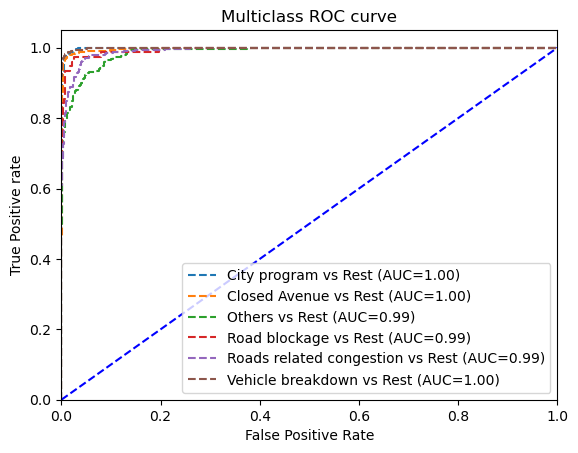

In [22]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [23]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.936,0.930,0.909,0.918,0.995


In [24]:
import sys

with open(outputFilename, 'a') as f:
    print('GBoost-infercent,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)